In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF_by_cell import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
#ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571


import numpy as np

Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2

import seaborn as sns
import matplotlib.pyplot as plt

from mplh import cluster_help

fig_utils from mplh
here


In [4]:
os.chdir(ROOT_DIR)

## Files setup

In [5]:
indir=join(RESULTS,"mttrace")
mapq = "mapq_0"
num_reads = 200
cellr="True"
in_prefix = f'2020_11_18'
pbmc_j = "PBMC_J"
pbmc_p = "PBMC_P"



pbmc_j_indir = join(indir, in_prefix, pbmc_j,mapq,f"cellr_{cellr}")
pbmc_p_indir = join(indir, in_prefix, pbmc_p,mapq,f"cellr_{cellr}")

# sc_coverage_pbmc_j_f = join(pbmc_j_indir,"scPileup_concat_200",pbmc_j+"_200_all.coverage.txt.gz")
# sc_coverage_pbmc_p_f = join(pbmc_p_indir,"scPileup_concat_200",pbmc_p + "_200_all.coverage.txt.gz")
coverage_pbmc_j_dir = join(indir, in_prefix, pbmc_j, mapq, f"{pbmc_j}_scPileup_{num_reads}")
coverage_pbmc_p_dir = join(indir, in_prefix, pbmc_p, mapq, f"{pbmc_p}_scPileup_{num_reads}")

concat_pbmc_j_dir = join(pbmc_j_indir,f"{pbmc_j}_{num_reads}")
concat_pbmc_p_dir = join(pbmc_p_indir,f"{pbmc_p}_{num_reads}")

In [6]:
min_cells=100
min_reads=10
topN=0
min_het_cells=100
het_thresh=0.02

In [7]:
from src.utils.parse_config import read_config_file
p = read_config_file("parameters/2020_11_18_Croker_mito.yaml")

mt_ref_fa = p["mt_ref_fa"]

In [8]:
dirname = f"minC{min_cells}_minR{min_reads}_topN{topN}_hetC{min_het_cells}_hetT{het_thresh}_cellr{cellr}"
outdir = join(indir, f"lineage_trace/{in_prefix}/cellr_{cellr}/report", dirname)
if not os.path.exists(outdir):
    os.makedirs(outdir)
outdir

'/data2/mito_lineage/data/processed/mttrace/lineage_trace/2020_11_18/cellr_True/report/minC100_minR10_topN0_hetC100_hetT0.02_cellrTrue'

### Create allele frequency matrix for both, but add metadata for each cell about which experiment it came from
### Cluster and look

### Additional requirements is to remove poor-quality variants of BQ- see if Erick has the code of the mixture model

In [9]:
print(mt_ref_fa)
print(maxBP)
print(coverage_pbmc_p_dir)
print(concat_pbmc_p_dir)

/data2/mito_lineage/data/external/GRCh38_MT_blacklist/chrM.fasta
16571
/data2/mito_lineage/data/processed/mttrace/2020_11_18/PBMC_P/mapq_0/PBMC_P_scPileup_200
/data2/mito_lineage/data/processed/mttrace/2020_11_18/PBMC_P/mapq_0/cellr_True/PBMC_P_200


In [10]:
pbmc_p_AF_by_cell, pbmc_p_BQ_by_cell, pbmc_p_af, pbmc_p_bq_df, pbmc_p_nt_df = calculate_af(coverage_pbmc_p_dir, concat_pbmc_p_dir, ref_fasta=mt_ref_fa, 
                                                                                           AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, min_reads=min_reads, 
                                                                                           min_het_cells=min_het_cells, het_thresh=het_thresh)

no alt count 1
topN 0
Number of positions to keep : 16569
Number of cells to keep : 330
G not found for ATTACTCAGTAGCAAT-1
coverage not found for GTAGACTCAATGATGA-1
T not found for AGGCGTCCACGCGCAT-1
coverage not found for ACTACGACATCACAGT-1
C not found for GGAGGATTCCGGAAAG-1
G not found for ATTACTCAGTAGCAAT-1
coverage not found for GTAGACTCAATGATGA-1
T not found for AGGCGTCCACGCGCAT-1
coverage not found for ACTACGACATCACAGT-1
C not found for GGAGGATTCCGGAAAG-1
Positions that pass het filter: 107


In [11]:
print(f"Number of positions with heteroplasmy fraction above 0: {(pbmc_p_AF_by_cell>0).any(axis=0).sum()}")

Number of positions with heteroplasmy fraction above 0: 107


In [12]:
pbmc_p_AF_by_cell

,73G,146C,199C,263G,300C,302T,303G,310C,442G,449A,...,15175T,15289C,15301A,15326G,15377C,15443G,15448G,16223T,16295T,16519C
ACAAGCTCATCATGTG-1,0.999278,0.994300,0.997015,0.997006,0.065253,0.065505,0.106551,0.678720,0.024029,0.036564,...,0.998586,0.998599,0.996889,0.998008,0.025598,0.102123,0.030997,0.998067,0.991597,0.996005
TGAGCCGGTTAGTAGA-1,0.997674,1.000000,0.995370,1.000000,0.041199,0.042781,0.067039,0.715909,0.026423,0.040359,...,0.998363,1.000000,0.998179,0.998311,0.012759,0.072347,0.025316,0.994962,0.996454,0.996753
AGATTCGTCTTCTCTC-1,1.000000,1.000000,0.994220,1.000000,0.027778,0.034722,0.079710,0.591667,0.019763,0.039024,...,0.996633,1.000000,1.000000,1.000000,0.023438,0.027586,0.003413,0.989474,0.990385,0.992453
ACATGGTTCCTTACGC-1,0.995495,1.000000,0.993671,1.000000,0.022727,0.059701,0.100000,0.696078,0.000000,0.033708,...,1.000000,0.978022,0.995885,0.980000,0.032609,0.013986,0.007463,0.994709,0.991150,1.000000
AGTGTACCAATGTAAG-1,1.000000,0.996795,0.987705,1.000000,0.041667,0.046218,0.111607,0.758794,0.036017,0.043678,...,1.000000,1.000000,0.996350,1.000000,0.020701,0.055655,0.017730,0.991279,0.994667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGTGCCGCACTGGGCT-1,0.997118,0.990654,1.000000,1.000000,0.063025,0.064516,0.078212,0.580110,0.014981,0.056140,...,1.000000,0.997006,0.997549,0.995495,0.012500,0.055233,0.037855,1.000000,0.996226,0.995134
TTAGCGATCTACTGCC-1,0.991632,1.000000,1.000000,1.000000,0.052632,0.017241,0.038462,0.367347,0.018868,0.046154,...,0.993007,1.000000,1.000000,1.000000,0.024291,0.030568,0.014218,0.987952,1.000000,1.000000
TTCATCACATCGGCTG-1,0.996078,1.000000,1.000000,1.000000,0.034483,0.063584,0.073171,0.668790,0.042857,0.025105,...,1.000000,1.000000,1.000000,1.000000,0.024540,0.055851,0.040872,0.993031,1.000000,1.000000
CATTCCGTCCGTGCGA-1,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.222222,0.000000,1.000000,1.000000,1.000000


cmap None


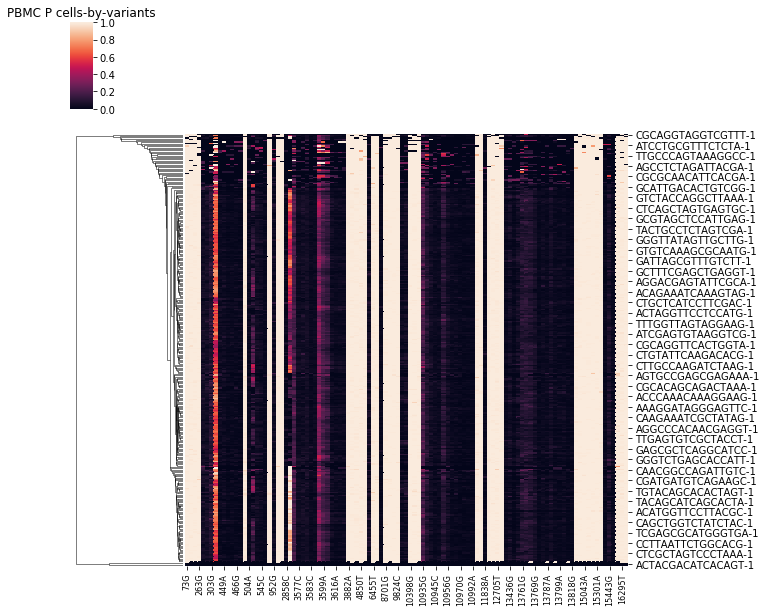

In [13]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_p_AF_by_cell, row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC P cells-by-variants")
plt.savefig(join(outdir,"pbmc_p_variants.png"))

## PBMC J

In [14]:
pbmc_j_AF_by_cell, pbmc_j_BQ_by_cell, pbmc_j_af, pbmc_j_bq_df, pbmc_j_nt_df = calculate_af(coverage_pbmc_j_dir, concat_pbmc_j_dir, ref_fasta=mt_ref_fa, 
                                                                                           AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, min_reads=min_reads, 
                                                                                           min_het_cells=min_het_cells, het_thresh=het_thresh)

no alt count 3
topN 0
Number of positions to keep : 16569
Number of cells to keep : 735
Positions that pass het filter: 161


In [15]:
print(f"Number of positions with heteroplasmy fraction above 0: {(pbmc_j_AF_by_cell>0).any(axis=0).sum()}")

Number of positions with heteroplasmy fraction above 0: 161


In [16]:
pbmc_j_AF_by_cell

,73G,146C,199C,263G,278C,297C,300C,301C,302C,303G,...,15444G,15446G,15447G,15448G,16223T,16295T,16362C,16371G,16374G,16519C
ACAAGCTCATCATGTG-1,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
AGATTCGTCCCACTAC-1,1.000000,1.000000,0.980392,1.0,0.000000,0.048387,0.086207,0.038462,0.021739,0.000000,...,0.000000,0.010417,0.031915,0.010638,0.990099,1.000000,1.000000,0.000000,0.009804,1.000000
CATGTTTAGTAATGTG-1,1.000000,0.992308,1.000000,1.0,0.025641,0.017391,0.099010,0.021739,0.000000,0.000000,...,0.019608,0.024510,0.030151,0.040201,0.992806,0.994318,1.000000,0.008889,0.026667,0.993711
TGCTTCGGTCAATCCA-1,1.000000,1.000000,1.000000,1.0,0.009174,0.014286,0.071429,0.000000,0.025000,0.000000,...,0.013100,0.004237,0.000000,0.000000,1.000000,1.000000,1.000000,0.011236,0.025806,1.000000
CGAGTTAGTCTGAGCC-1,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,...,0.038462,0.000000,0.080000,0.000000,1.000000,0.928571,1.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCGGAAAAGTCACGCC-1,0.990991,1.000000,1.000000,1.0,0.012500,0.000000,0.080000,0.021277,0.023810,0.000000,...,0.008929,0.000000,0.047170,0.000000,0.986301,0.959459,0.978723,0.014599,0.050000,1.000000
ACAGGCCCACAGGTAG-1,1.000000,1.000000,1.000000,1.0,0.000000,0.013889,0.187500,0.032258,0.000000,0.017544,...,0.000000,0.010870,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.019608,1.000000
GCACCTTTCGCAAGCC-1,1.000000,1.000000,0.992188,1.0,0.011905,0.016949,0.140000,0.078947,0.085714,0.147059,...,0.014286,0.004762,0.019608,0.013699,0.995283,0.995349,1.000000,0.008850,0.014218,1.000000
AGGCCCACAACAAACA-1,1.000000,1.000000,1.000000,1.0,0.007143,0.068966,0.120000,0.045977,0.047619,0.037037,...,0.020979,0.020270,0.013793,0.034247,1.000000,0.993289,1.000000,0.000000,0.007752,1.000000


cmap None


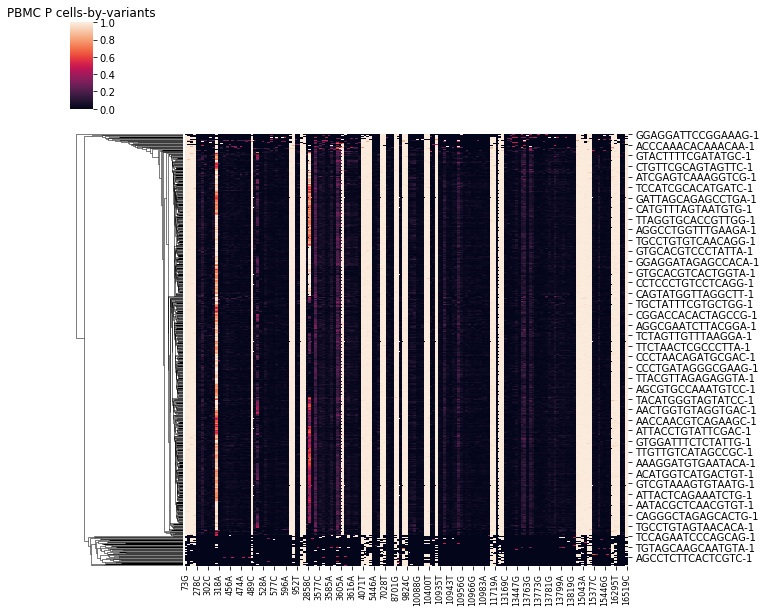

In [17]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_j_AF_by_cell, row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC P cells-by-variants")
plt.savefig(join(outdir,"pbmc_j_variants.png"))

## Merge the two

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Overlap of called variants')

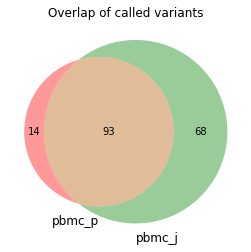

In [18]:

pbmc_j_AF_by_cell.index = pbmc_j_AF_by_cell.index + "_pbmc_j"
pbmc_p_AF_by_cell.index = pbmc_p_AF_by_cell.index + "_pbmc_p"
all_cells = pd.concat((pbmc_p_AF_by_cell,pbmc_j_AF_by_cell) ,axis=1)
all_cells_var_overlap = pd.concat((pbmc_p_AF_by_cell,pbmc_j_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values


%matplotlib inline
venn2([set(pbmc_p_AF_by_cell.columns.values),set(pbmc_j_AF_by_cell.columns.values)],set_labels=["pbmc_p","pbmc_j"])
plt.title("Overlap of called variants")


In [20]:
row_meta = pd.concat((pd.DataFrame(index=pbmc_j_AF_by_cell.index, data={"Sample":["pbmc_j"]*pbmc_j_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= pbmc_p_AF_by_cell.index, data={"Sample":["pbmc_p"]*pbmc_p_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells_var_overlap.index]
row_meta

,Sample
ACAAGCTCATCATGTG-1_pbmc_p,pbmc_p
TGAGCCGGTTAGTAGA-1_pbmc_p,pbmc_p
AGATTCGTCTTCTCTC-1_pbmc_p,pbmc_p
ACATGGTTCCTTACGC-1_pbmc_p,pbmc_p
AGTGTACCAATGTAAG-1_pbmc_p,pbmc_p
...,...
GCGGAAAAGTCACGCC-1_pbmc_j,pbmc_j
ACAGGCCCACAGGTAG-1_pbmc_j,pbmc_j
GCACCTTTCGCAAGCC-1_pbmc_j,pbmc_j
AGGCCCACAACAAACA-1_pbmc_j,pbmc_j


cmap None


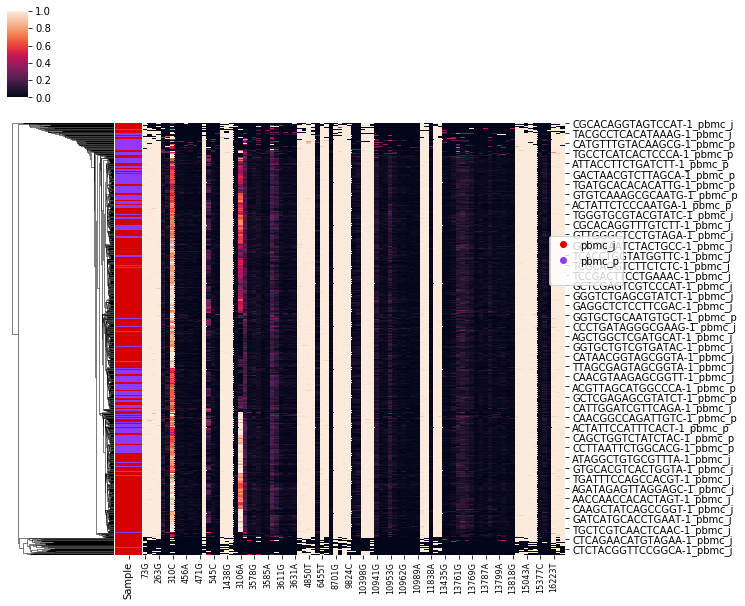

In [21]:
%matplotlib inline
cluster_help.plot_cluster(df=all_cells_var_overlap, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_OnlyoverlapVariants.png"))